In [ ]:
# PS5841 Data Science in Finance and Insurance HW2
# Young Sim, js5134

In [53]:
# import modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

In [54]:
###########################################################################################################################
# Be aware not to change the original name of files when read them.                                                       #
# Also upload files to the root directory of Jupyter Notebook so that you may read them without specifying the address.   #
# Do not be scared by the number of problems; each step is easy. Have fun!                                                #
###########################################################################################################################

In [55]:
# Question 1

#A multiIndexed Series is created as following
letters = ['A','B','C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)

In [56]:
# Question 1.1
 
# Your Code here.

# Check the index of s is lexicographically sorted 
s.index.is_lexsorted()

True

In [57]:
# Question 1.2

# Your Code here.

# Select the labels 1, 3 and 6 from the second level
s.loc[:,[1,3,6]]

A  1    0.618104
   3    0.160035
   6    0.176362
B  1    0.435835
   3    0.806822
   6    0.420475
C  1    0.563872
   3    0.575851
   6    0.537941
dtype: float64

In [58]:
# Question 1.3

# Your Code here.

# Slice the Series s
new_s = s.loc[pd.IndexSlice[:'B', 5:]]
new_s

A  5    0.894271
   6    0.176362
   7    0.837092
   8    0.464201
   9    0.771860
B  5    0.999803
   6    0.420475
   7    0.938449
   8    0.755459
   9    0.839914
dtype: float64

In [59]:
# Question 1.4

# Your Code here.

# Exchange the levels of the MultiIndex 
new_s = new_s.swaplevel(0, 1)
new_s

5  A    0.894271
6  A    0.176362
7  A    0.837092
8  A    0.464201
9  A    0.771860
5  B    0.999803
6  B    0.420475
7  B    0.938449
8  B    0.755459
9  B    0.839914
dtype: float64

In [60]:
# Check if the new Series is lexsorted
new_s.index.is_lexsorted()

False

In [61]:
# Lexsort the new Series
new_s = new_s.sort_index()
new_s.index.is_lexsorted()

True

In [62]:
# Check the result
new_s

5  A    0.894271
   B    0.999803
6  A    0.176362
   B    0.420475
7  A    0.837092
   B    0.938449
8  A    0.464201
   B    0.755459
9  A    0.771860
   B    0.839914
dtype: float64

In [63]:
# Question 2
# A DataFrame object is created as following 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [64]:
# Question 2.1

# Your Code here.

# Fill in these missing numbers and make the column an integer column
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [65]:
# Question 2.2

# Your Code here.

# Split each string on '_' to give a new temporary DataFrame with the correct values
temp = df['From_To'].str.split('_',expand=True)
temp.columns = ['from','to']
temp

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [66]:
# Question 2.3

# Your Code here.

# Standardize the strings so that only the first letter is uppercase
temp['from'] = temp['from'].str.title()
temp['to'] = temp['to'].str.title()
temp

,from,to
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [67]:
# Question 2.4

# Your Code here.

# Delete the From_To column from df and attach the temporary DataFrame
df = df.drop('From_To',axis=1)
df = df.join(temp)
df

,FlightNumber,RecentDelays,Airline,from,to
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [68]:
# Question 2.5

# Your Code here.

# Pull out just the airline name from the 'Airline' column
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)',expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,from,to
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


In [69]:
# Question 2.6

# Your Code here.

# Expand the Series of lists into a DataFrame named delays
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,from,to,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [70]:
# Question 3.2

# Your Code here.

# Load and clean data
spy = pd.read_csv('SPY.csv',index_col='Date',usecols=['Date','Adj Close'])
aig = pd.read_csv('AIG.csv',index_col='Date',usecols=['Date','Adj Close'])
amzn = pd.read_csv('AMZN.csv',index_col='Date',usecols=['Date','Adj Close'])
jpm = pd.read_csv('JPM.csv',index_col='Date',usecols=['Date','Adj Close'])
f = pd.read_csv('F.csv',index_col='Date',usecols=['Date','Adj Close'])

data = pd.concat([spy,aig,amzn,jpm,f],axis = 1)
data.columns = ['SPY','AIG','AMZN','JPM','F']
data.head()

,SPY,AIG,AMZN,JPM,F
Date,,,,,
2012-12-01,125.531403,32.063709,250.869995,37.132530,9.884076
2013-01-01,132.893219,34.361767,265.500000,39.733578,9.884076
2013-02-01,134.588837,34.525253,264.269989,41.596584,9.695443
2013-03-01,139.080719,35.260994,266.489990,40.355156,10.110636
2013-04-01,142.383240,37.622627,253.809998,41.673119,10.541202


In [71]:
# Question 3.3

# Your Code here.

# Calculate monthly returns 
m_returns = data.pct_change()
m_returns.head()

,SPY,AIG,AMZN,JPM,F
Date,,,,,
2012-12-01,NaN,NaN,NaN,NaN,NaN
2013-01-01,0.058645,0.071672,0.058317,0.070048,0.000000
2013-02-01,0.012759,0.004758,-0.004633,0.046887,-0.019085
2013-03-01,0.033375,0.021310,0.008401,-0.029844,0.042824
2013-04-01,0.023745,0.066976,-0.047581,0.032659,0.042585


In [72]:
# Question 3.4

# Your Code here.

# Calculate normalized returns
norm_returns = (m_returns - m_returns.mean()) / m_returns.std()
norm_returns.head()

,SPY,AIG,AMZN,JPM,F
Date,,,,,
2012-12-01,NaN,NaN,NaN,NaN,NaN
2013-01-01,1.617734,1.127121,0.388068,0.899362,-0.075116
2013-02-01,0.004274,-0.121472,-0.437631,0.492590,-0.418010
2013-03-01,0.729167,0.187392,-0.266676,-0.855080,0.694300
2013-04-01,0.390571,1.039498,-1.000979,0.242693,0.690022


In [73]:
# Question 3.5

# Your Code here.

# Calculate the correlation matrix
norm_returns.corr()

,SPY,AIG,AMZN,JPM,F
SPY,1.000000,0.606461,0.549188,0.556926,0.625750
AIG,0.606461,1.000000,0.349058,0.524451,0.491816
AMZN,0.549188,0.349058,1.000000,0.204424,0.335725
JPM,0.556926,0.524451,0.204424,1.000000,0.473898
F,0.625750,0.491816,0.335725,0.473898,1.000000


In [74]:
# Question 3.6

# Your Code here.

#Perform a Student’s t-test

# SPY and AIG
print("Student's t-test results for SPY normalized returns and AIG normalized returns:")
print(stats.ttest_ind(norm_returns['SPY'].dropna(),norm_returns['AIG'].dropna()))
print("")

# SPY and AMZN
print("Student's t-test results for SPY normalized returns and AMZN normalized returns:")
print(stats.ttest_ind(norm_returns['SPY'].dropna(),norm_returns['AMZN'].dropna()))
print("")

# SPY and JPM
print("Student's t-test results for SPY normalized returns and JPM normalized returns:")
print(stats.ttest_ind(norm_returns['SPY'].dropna(),norm_returns['JPM'].dropna()))
print("")

# SPY and F
print("Student's t-test results for SPY normalized returns and F normalized returns:")
print(stats.ttest_ind(norm_returns['SPY'].dropna(),norm_returns['F'].dropna()))
print("")

print("The null hypothesis such that the two means are equal cannot be rejected in any of the four test results.")

Student's t-test results for SPY normalized returns and AIG normalized returns:
Ttest_indResult(statistic=-2.660412100713552e-16, pvalue=0.9999999999999998)

Student's t-test results for SPY normalized returns and AMZN normalized returns:
Ttest_indResult(statistic=-5.194137910916934e-16, pvalue=0.9999999999999996)

Student's t-test results for SPY normalized returns and JPM normalized returns:
Ttest_indResult(statistic=-2.2296787129789765e-16, pvalue=0.9999999999999998)

Student's t-test results for SPY normalized returns and F normalized returns:
Ttest_indResult(statistic=-4.2313221030396485e-16, pvalue=0.9999999999999997)

The null hypothesis such that the two means are equal cannot be rejected in any of the four test results.


In [75]:
# Question 4.2

# Load and clean data
GS10 = pd.read_excel('GS10.xls',header = 0, index_col = 'observation_date', skiprows = 10)
GS2 = pd.read_excel('GS2.xls', header = 0, index_col = 'observation_date', skiprows = 10)
GDP = pd.read_excel('GDP.xls',header = 0, index_col = 'observation_date', skiprows = 10)

GS10 = GS10.rename(columns = {'GS10':'10Y'})
GS2 = GS2.rename(columns = {'GS2':'2Y'})
GDP = GDP.rename(columns = {'A191RP1Q027SBEA':'GDP'})

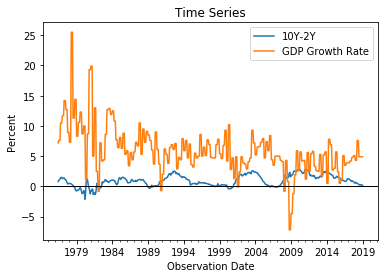

In [76]:
# Question 4.2.a

# Your Code here.

# Create new dataframe for 10Y-2Y
TR = pd.DataFrame(GS10['10Y']-GS2['2Y']).rename(columns = {0:'10Y-2Y'})

# Plot time series data
plot_data = pd.merge(TR,GDP,how='left',on='observation_date')
plot_data['GDP'].fillna(method = 'ffill', inplace = True)
plot_data = plot_data[plot_data['10Y-2Y'].isna()==False]
plot_data.plot()
plt.legend(labels = ['10Y-2Y','GDP Growth Rate'])
plt.xlabel('Observation Date')
plt.ylabel('Percent')
plt.title('Time Series')
plt.axhline(y=0, color='k', linewidth=1)

In [77]:
# Question 4.2.b

# Your Code here.

#Create new dataframes for lagged GDP growth rate
GDP_3m = pd.DataFrame(GDP['GDP'].shift(-1))
GDP_6m = pd.DataFrame(GDP['GDP'].shift(-2))

In [78]:
# Create 3 month lag dataframe to plot
plot_lag3 = pd.merge(TR,GDP_3m,how='left',on='observation_date')
plot_lag3['GDP'].fillna(method = 'ffill', inplace = True)
plot_lag3 = plot_lag3[plot_lag3['10Y-2Y'].isna()==False]

# Datapoints where 10Y-2Y < 0 and GDP growth rate is negative
print("Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:")
plot_lag3[(plot_lag3['10Y-2Y'] < 0) & (plot_lag3['GDP'] < 0)]

Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:


,10Y-2Y,GDP
observation_date,,
1981-10-01,-0.39,-0.8


Majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates (see green dots).
Only a few datapoints show the expected lead-lag relationship between inverted treasury rate and economic recession.


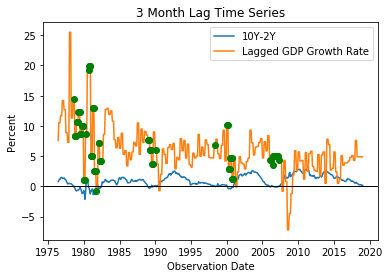

In [79]:
# Plot time series data for 3 month lag relationship
plt.plot(plot_lag3)
plt.legend(labels = ['10Y-2Y','Lagged GDP Growth Rate'])
plt.xlabel('Observation Date')
plt.ylabel('Percent')
plt.title('3 Month Lag Time Series')
plt.axhline(y=0, color='k', linewidth=1)

# Plot GDP for inverted treasury rate (green dots)
plt.plot(plot_lag3[plot_lag3['10Y-2Y']<0]['GDP'],'og')
print("Majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates (see green dots).")
print("Only a few datapoints show the expected lead-lag relationship between inverted treasury rate and economic recession.")

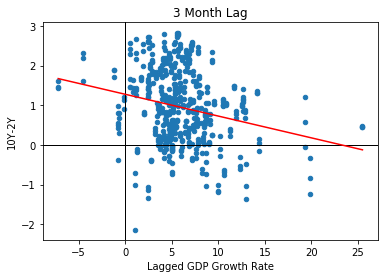

In [80]:
# Create scatterplot
plot_lag3.plot('GDP','10Y-2Y',kind='scatter')
plt.xlabel('Lagged GDP Growth Rate')
plt.title('3 Month Lag')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# Find the linear relationship between 10Y-2Y and 3 month-lagged GDP growth rate
m1, b1, r1, p1, SE1 = stats.linregress(plot_lag3['GDP'],plot_lag3['10Y-2Y'])

# Plot the result of linear regression
xmin = plot_lag3['GDP'].min()
xmax = plot_lag3['GDP'].max()
plt.plot([xmin,xmax],[m1*xmin+b1,m1*xmax+b1],'-r')

In [81]:
# Print results
print("Results of linear regression:")
print("Slope: " + str(m1))
print("Intercept: " + str(b1))
print("Correlation: " + str(r1))
print("p-value: " + str(p1))
print("Standard Error: " + str(SE1))
print("")
print("Unlike what was expected, the data does not show that inverted treasury rate has lead-lag relationship with negative GDP growth rate.") 
print("There exists a negative linear relationship between 10Y-2Y and lagged GDP growth rate.")
print("This may be due to the influence of how the Fed responds to the yield curve and other key macroeconomic factors.")

Results of linear regression:
Slope: -0.05488402798462269
Intercept: 1.2773417523909956
Correlation: -0.23215516643111858
p-value: 1.078406062604614e-07
Standard Error: 0.010182442597773933

Unlike what was expected, the data does not show that inverted treasury rate has lead-lag relationship with negative GDP growth rate.
There exists a negative linear relationship between 10Y-2Y and lagged GDP growth rate.
This may be due to the influence of how the Fed responds to the yield curve and other key macroeconomic factors.


In [82]:
# Create 6 month lag dataframe to plot
plot_lag6 = pd.merge(TR,GDP_6m,how='left',on='observation_date')
plot_lag6['GDP'].fillna(method = 'ffill', inplace = True)
plot_lag6 = plot_lag6[plot_lag6['10Y-2Y'].isna() == False]

# Datapoints where 10Y-2Y < 0 and GDP growth rate is negative
print("Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:")
plot_lag6[(plot_lag6['10Y-2Y'] < 0) & (plot_lag6['GDP'] < 0)]

Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:


,10Y-2Y,GDP
observation_date,,
1981-07-01,-1.07,-0.8
1981-08-01,-1.34,-0.8
1981-09-01,-1.14,-0.8


Majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates (see green dots).
Only a few datapoints show the expected lead-lag relationship between inverted treasury rate and economic recession.


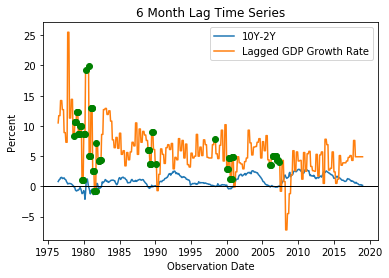

In [83]:
# Plot time series data for 6 month lag relationship
plt.plot(plot_lag6)
plt.legend(labels = ['10Y-2Y','Lagged GDP Growth Rate'])
plt.xlabel('Observation Date')
plt.ylabel('Percent')
plt.title('6 Month Lag Time Series')
plt.axhline(y=0, color='k', linewidth=1)

# Plot GDP for inverted treasury rate (green dots)
plt.plot(plot_lag6[plot_lag6['10Y-2Y'] < 0]['GDP'],'og')
print("Majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates (see green dots).")
print("Only a few datapoints show the expected lead-lag relationship between inverted treasury rate and economic recession.")

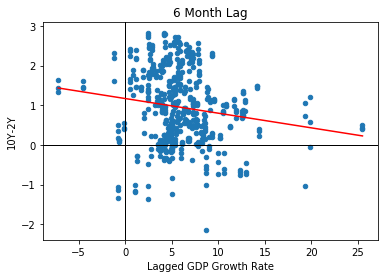

In [84]:
# Create scatterplot
plot_lag6.plot('GDP','10Y-2Y',kind='scatter')
plt.xlabel('Lagged GDP Growth Rate')
plt.title('6 Month Lag')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# Find the linear relationship between 10Y-2Y and 6 month-lagged GDP growth rate
m2, b2, r2, p2, SE2 = stats.linregress(plot_lag6['GDP'],plot_lag6['10Y-2Y'])

# Plot the result of linear regression
xmin = plot_lag6['GDP'].min()
xmax = plot_lag6['GDP'].max()
plt.plot([xmin,xmax],[m2*xmin+b2,m2*xmax+b2],'-r')

In [85]:
# Print results
print("Results of linear regression:")
print("Slope: " + str(m2))
print("Intercept: " + str(b2))
print("Correlation: " + str(r2))
print("p-value: " + str(p2))
print("Standard Error: " + str(SE2))
print("")
print("Unlike what was expected, the data does not show that inverted treasury rate has lead-lag relationship with negative GDP growth rate.") 
print("There exists a negative linear relationship between 10Y-2Y and lagged GDP growth rate.")
print("This may be due to the influence of how the Fed responds to the yield curve and other key macroeconomic factors.")


Results of linear regression:
Slope: -0.03693726753997923
Intercept: 1.1700920383234867
Correlation: -0.15581474766386047
p-value: 0.0004020965138378486
Standard Error: 0.01036893405762025

Unlike what was expected, the data does not show that inverted treasury rate has lead-lag relationship with negative GDP growth rate.
There exists a negative linear relationship between 10Y-2Y and lagged GDP growth rate.
This may be due to the influence of how the Fed responds to the yield curve and other key macroeconomic factors.


In [86]:
# Try the same thing for 1 year lagged GDP growth rate
GDP_1y = pd.DataFrame(GDP['GDP'].shift(-4))

# Create 1 year lag dataframe to plot
plot_lag1y = pd.merge(TR,GDP_1y,how='left',on='observation_date')
plot_lag1y['GDP'].fillna(method = 'ffill', inplace = True)
plot_lag1y = plot_lag1y[plot_lag1y['10Y-2Y'].isna() == False]

# Datapoints where 10Y-2Y < 0 and GDP growth rate is negative
print("Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:")
plot_lag1y[(plot_lag1y['10Y-2Y'] < 0) & (plot_lag1y['GDP'] < 0)]

Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:


,10Y-2Y,GDP
observation_date,,
1981-01-01,-0.69,-0.8
1981-02-01,-0.73,-0.8
1981-03-01,-0.45,-0.8
2000-07-01,-0.29,-0.1
2000-08-01,-0.40,-0.1
2000-09-01,-0.28,-0.1
2007-01-01,-0.12,-0.8
2007-02-01,-0.13,-0.8
2007-03-01,-0.01,-0.8


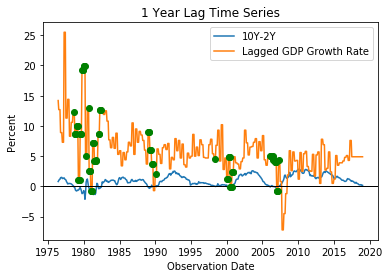

In [101]:
# Plot time series data for 1 year lag relationship
plt.plot(plot_lag1y)
plt.legend(labels = ['10Y-2Y','Lagged GDP Growth Rate'])
plt.xlabel('Observation Date')
plt.ylabel('Percent')
plt.title('1 Year Lag Time Series')
plt.axhline(y=0, color='k', linewidth=1)

# Plot GDP for inverted treasury rate (green dots)
plt.plot(plot_lag1y[plot_lag1y['10Y-2Y'] < 0]['GDP'],'og')

In [105]:
# Try the same thing for 2 year lagged GDP growth rate
GDP_2y = pd.DataFrame(GDP['GDP'].shift(-8))

# Create 2 year month lag dataframe to plot
plot_lag2y = pd.merge(TR,GDP_2y,how='left',on='observation_date')
plot_lag2y['GDP'].fillna(method = 'ffill', inplace = True)
plot_lag2y = plot_lag2y[plot_lag2y['10Y-2Y'].isna() == False]

# Datapoints where 10Y-2Y < 0 and GDP growth rate is negative
print("Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:")
plot_lag2y[(plot_lag2y['10Y-2Y'] < 0) & (plot_lag2y['GDP'] < 0)]

Datapoints where 10Y-2Y < 0 and lagged GDP growth rate is negative are:


,10Y-2Y,GDP
observation_date,,
1980-01-01,-0.70,-0.8
1980-02-01,-1.01,-0.8
1980-03-01,-2.13,-0.8
2006-02-01,-0.10,-0.8
2006-03-01,-0.01,-0.8
2006-10-01,-0.07,-7.2
2006-11-01,-0.14,-7.2
2006-12-01,-0.11,-7.2
2007-01-01,-0.12,-4.5


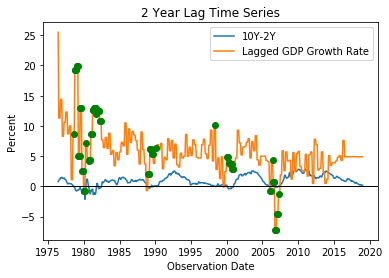

In [103]:
# Plot time series data for 2 year lag relationship
plt.plot(plot_lag2y)
plt.legend(labels = ['10Y-2Y','Lagged GDP Growth Rate'])
plt.xlabel('Observation Date')
plt.ylabel('Percent')
plt.title('2 Year Lag Time Series')
plt.axhline(y=0, color='k', linewidth=1)

# Plot GDP for inverted treasury rate (green dots)
plt.plot(plot_lag2y[plot_lag2y['10Y-2Y'] < 0]['GDP'],'og')

In [104]:
print("While still majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates for 1 year and 2 year lag relationship, more such datapoints exist.")
print("The unexpected results for 3 month and 6 month lag relationships may partly be because in real economy a few months of lag time was not enough to capture the lead-lag relationship.")

While still majority of the datapoints where 10Y-2Y < 0 have positive lagged GDP growth rates for 1 year and 2 year lag relationship, more such datapoints exist.
The unexpected results for 3 month and 6 month lag relationships may partly be because the lag time was not enough.
